<a href="https://colab.research.google.com/github/Thales-cv/FormulaTesteContas/blob/master/Tarefa4_PedroPacheco_PedroCardoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## PEDRO CARDOSO, PEDRO PACHECO, RIAN, LÉO FALCÃO e THALES
import os
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/dataset.csv')
dataset.shape

(5202, 9)

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.shape

(5202, 9)

# Tratamento dos Dados

In [ ]:
def check_class(row):
    # Verificar se houve vitória para 'x'
    if (row[0] == 'x' and row[1] == 'x' and row[2] == 'x') or \
       (row[3] == 'x' and row[4] == 'x' and row[5] == 'x') or \
       (row[6] == 'x' and row[7] == 'x' and row[8] == 'x') or \
       (row[0] == 'x' and row[3] == 'x' and row[6] == 'x') or \
       (row[1] == 'x' and row[4] == 'x' and row[7] == 'x') or \
       (row[2] == 'x' and row[5] == 'x' and row[8] == 'x') or \
       (row[0] == 'x' and row[4] == 'x' and row[8] == 'x') or \
       (row[2] == 'x' and row[4] == 'x' and row[6] == 'x'):
        return 'x ganhou'

    # Verificar se houve vitória para 'o'
    elif (row[0] == 'o' and row[1] == 'o' and row[2] == 'o') or \
         (row[3] == 'o' and row[4] == 'o' and row[5] == 'o') or \
         (row[6] == 'o' and row[7] == 'o' and row[8] == 'o') or \
         (row[0] == 'o' and row[3] == 'o' and row[6] == 'o') or \
         (row[1] == 'o' and row[4] == 'o' and row[7] == 'o') or \
         (row[2] == 'o' and row[5] == 'o' and row[8] == 'o') or \
         (row[0] == 'o' and row[4] == 'o' and row[8] == 'o') or \
         (row[2] == 'o' and row[4] == 'o' and row[6] == 'o'):
        return 'o ganhou'

    if 'b' in row.values:
      return 'tem jogo'
    else:
      return 'empate'

In [ ]:
# Aplicar a função para determinar a nova classe a cada linha do DataFrame
dataset['class'] = dataset.apply(check_class, axis=1)

# Salvar o DataFrame modificado de volta para o arquivo CSV
dataset.to_csv('tictactoe.csv', index=False)

# SEPARAÇÃO TREINO/TESTE

In [ ]:
dataset = pd.read_csv('/content/tictactoe.csv')

dataset.shape

(5202, 10)

In [ ]:
dataset.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,o,x,o,x,b,x,x,b,b,tem jogo
1,b,b,b,o,x,b,b,o,x,tem jogo
2,x,x,b,b,x,o,x,b,b,tem jogo
3,x,x,x,b,o,x,b,b,b,x ganhou
4,b,b,b,b,x,o,x,x,x,x ganhou


In [ ]:
mapeamento = {'x': 1, 'b': 2, 'o': 3}
dataset = dataset.replace(mapeamento)
dataset.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,3,1,3,1,2,1,1,2,2,tem jogo
1,2,2,2,3,1,2,2,3,1,tem jogo
2,1,1,2,2,1,3,1,2,2,tem jogo
3,1,1,1,2,3,1,2,2,2,x ganhou
4,2,2,2,2,1,3,1,1,1,x ganhou


In [ ]:
dividas_treino, dividas_test = train_test_split(dataset,test_size=0.3)


Y_treino = dividas_treino['class']
X_treino = dividas_treino.drop(columns=["class"])


Y_test = dividas_test['class']
X_test = dividas_test.drop(columns=["class"])

X_test.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
3540,2,3,1,2,1,3,2,1,3
4384,1,1,2,2,1,3,2,2,2
299,2,3,1,2,2,3,1,1,1
2072,2,2,2,2,1,1,2,3,3
401,2,3,1,3,1,2,3,1,1


#TREINAMENTO KNN

In [ ]:
li = []
cl = []
for i in range(1, 12):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)

    clf.fit(X_treino.values, Y_treino.values)
    cl.append(clf)
    li.append(clf.score(X_test.values, Y_test.values))

In [ ]:
li

[0.8315182575272262,
 0.852017937219731,
 0.9256886611146701,
 0.9199231262011531,
 0.9359385009609225,
 0.91736066623959,
 0.923126201153107,
 0.9045483664317745,
 0.9103139013452914,
 0.8962203715566944,
 0.9045483664317745]

In [ ]:
ov = [3, 3, 3, 1, 1, 2, 2, 2, 2]
em = [1, 3, 1, 3, 1, 3, 3, 1, 3]
xv = [1, 2, 2, 2, 1, 2, 2, 2, 1]
tj = [2, 2, 2, 1, 2, 3, 2, 2, 2]

l = []

l.append(ov)
l.append(em)
l.append(xv)
l.append(tj)


for c in cl:
  result = c.predict(l)
  print(result)

['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']
['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']


# GRAFICO KNN

In [ ]:
import matplotlib.pyplot as plt

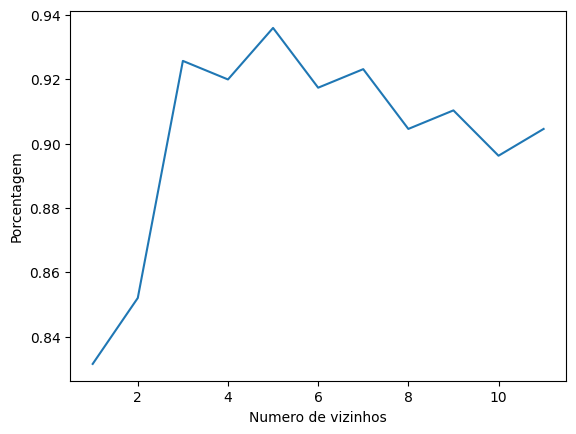

In [ ]:
plt.xlabel('Numero de vizinhos')
plt.ylabel('Porcentagem')
plt.plot( range(1,12), li)

In [ ]:
knn = cl[3]

# TREINAMENTO MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

cl = ''

# mlp_params = {
#    'hidden_layer_sizes': (100, ),  # Por exemplo, uma camada oculta com 100 neurônios
#    'activation': 'relu',            # Função de ativação ReLU
#    'solver': 'adam',                # Otimizador Adam
#    'alpha': 0.0001,                 # Parâmetro de regularização
#    'batch_size': 'auto',            # Tamanho do lote
#    'learning_rate': 'constant',     # Taxa de aprendizado constante
#    'learning_rate_init': 0.001,     # Taxa de aprendizado inicial
#    'max_iter': 200,                 # Número máximo de iterações
#    'random_state': 42               # Semente para reprodutibilidade
# }

mlp = MLPClassifier()
mlp.fit(X_treino.values, Y_treino.values)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
ov = [3, 3, 3, 1, 1, 2, 2, 2, 2]
em = [1, 3, 1, 3, 1, 3, 3, 1, 3]
xv = [1, 2, 2, 2, 1, 2, 2, 2, 1]
tj = [2, 2, 2, 1, 2, 3, 2, 2, 2]

l = []

l.append(ov)
l.append(em)
l.append(xv)
l.append(tj)

result = mlp.score(X_test.values, Y_test.values)
print(result)

0.9320948110185778


In [ ]:
mlp.predict(l)

array(['tem jogo', 'tem jogo', 'x ganhou', 'tem jogo'], dtype='<U8')

#TREINAMENTO HT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# tree_params = {
#    'criterion': 'gini',     # Critério para avaliação da qualidade da divisão
#    'splitter': 'best',      # Estratégia utilizada para escolher a divisão em cada nó
#    'max_depth': None,       # Profundidade máxima da árvore
#    'min_samples_split': 2,  # Número mínimo de amostras necessárias para dividir um nó interno
#    'min_samples_leaf': 1,   # Número mínimo de amostras necessárias para ser um nó folha
#    'random_state': 42       # Semente para reprodutibilidade
#}

tree = DecisionTreeClassifier()
tree.fit(X_treino.values, Y_treino.values)

result = tree.score(X_test.values, Y_test.values)
print(result)

0.9833440102498399


In [ ]:
ov = [3, 3, 3, 1, 1, 2, 2, 2, 2]
em = [1, 3, 1, 3, 1, 3, 3, 1, 3]
xv = [1, 2, 2, 2, 1, 2, 2, 2, 1]
tj = [2, 2, 2, 1, 2, 3, 2, 2, 2]

l = []

l.append(ov)
l.append(em)
l.append(xv)
l.append(tj)

result = c.predict(l)
print(result)

['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']


# TREINAMENTO RANDOM FOREST

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_treino.values, Y_treino.values)

result = rf.predict(l)
print(result)

['tem jogo' 'tem jogo' 'x ganhou' 'tem jogo']


In [ ]:
rf.score(X_test.values, Y_test.values)

# GAME

In [ ]:
def check_gameState(row):
    # Verificar se houve vitória para 'x'
    if (row[0] == 1 and row[1] == 1 and row[2] == 1) or \
       (row[3] == 1 and row[4] == 1 and row[5] == 1) or \
       (row[6] == 1 and row[7] == 1 and row[8] == 1) or \
       (row[0] == 1 and row[3] == 1 and row[6] == 1) or \
       (row[1] == 1 and row[4] == 1 and row[7] == 1) or \
       (row[2] == 1 and row[5] == 1 and row[8] == 1) or \
       (row[0] == 1 and row[4] == 1 and row[8] == 1) or \
       (row[2] == 1 and row[4] == 1 and row[6] == 1):
        return 'x ganhou'

    # Verificar se houve vitória para 'o'
    elif (row[0] == 3 and row[1] == 3 and row[2] == 3) or \
         (row[3] == 3 and row[4] == 3 and row[5] == 3) or \
         (row[6] == 3 and row[7] == 3 and row[8] == 3) or \
         (row[0] == 3 and row[3] == 3 and row[6] == 3) or \
         (row[1] == 3 and row[4] == 3 and row[7] == 3) or \
         (row[2] == 3 and row[5] == 3 and row[8] == 3) or \
         (row[0] == 3 and row[4] == 3 and row[8] == 3) or \
         (row[2] == 3 and row[4] == 3 and row[6] == 3):
        return 'o ganhou'

    if 2 in row:
      return 'tem jogo'
    else:
      return 'empate'

def print_board(board):
  print("\n", "=======================================================", "\n")
  cont = 0
  for row in board:
    print(" | ".join(row))
    if cont < len(board) -1:
      print("-" * 10)
    cont += 1

def check_winner(board):
  board_vector = []

  for row in board:
    for cel in row:
      if cel == 'o':
        board_vector.append(3)
      if cel == 'x':
        board_vector.append(1)
      if cel == ' ':
       board_vector.append(2)

  result = check_gameState(board_vector)

  if result == knn.predict([board_vector]):
    score_board["knn"][result] += 1
  if result == tree.predict([board_vector]):
    score_board["ht"][result] += 1
  if result == mlp.predict([board_vector]):
    score_board["mlp"][result] += 1
  if result == rf.predict([board_vector]):
    score_board["rf"][result] += 1

  return result

def get_human_move():
  while True:
    move = input("\nDigite a posição para jogar (1-9): \n")
    if move.isdigit() and 1 <= int(move) <= 9:
      return (int(move) - 1) // 3, (int(move) - 1) % 3
    else:
      print("Por favor, insira um número válido de 1 a 9.")
    return int(move)

def get_computer_move(board):
  empty_cells = [(row, col) for row in range(3) for col in range(3)
                 if board[row][col] == " "]
  return random.choice(empty_cells)

In [ ]:
import random
from google.colab import output


plays = 0

partidas = {"empate": 0, "tem jogo": 0, "o ganhou": 0, "x ganhou": 0}
score_board = {"knn": partidas.copy(), "ht":  partidas.copy(), "mlp":  partidas.copy(), "rf":  partidas.copy()}



def main():
  board = [[" " for _ in range(3)] for _ in range(3)]


  human_player = "x"
  computer_player = "o"
  current_player = human_player

  round = 0

  print_board(board)

  while round < 20000:


    if current_player == human_player:
      row, col = get_computer_move(board)
      current_player = computer_player
      output.clear()
    else:
      row, col = get_computer_move(board)
      current_player = human_player

    board[row][col] = current_player

    #print_board(board)

    game_result = check_winner(board)

    #print("Estado ATUAL: ", game_result)

    partidas[game_result] += 1

    if game_result != "tem jogo":
      current_player = human_player
      board = [[" " for _ in range(3)] for _ in range(3)]


    round += 1

  print(partidas)
  print('KNN', score_board['knn'])
  print('HT', score_board['ht'])
  print('MLP' ,score_board['mlp'])
  print('Random Forest', score_board['rf'])

if __name__ == "__main__":
  main()

NameError: name 'knn' is not defined